Tasks

1. Download the dataset
2. Load the dataset.
3. Perform Below Visualizations. </br>
    ● Univariate Analysis </br>
    ● Bi - Variate Analysis </br>
    ● Multi - Variate Analysis </br>
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

SOLUTIONS

1. Download the Dataset

2. Load the dataset.


In [1]:
import pandas as pd
import numpy as np

In [61]:
file=pd.read_csv("Churn_Modelling.csv")
df=pd.DataFrame(file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3. Perform Below Visualizations.

* Univariate Analysis - Histogram

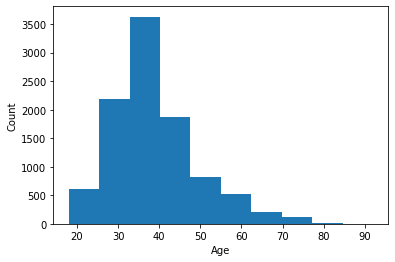

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* Bi - Variate Analysis </br>
i) Scatter plot - Age vs Credit Score

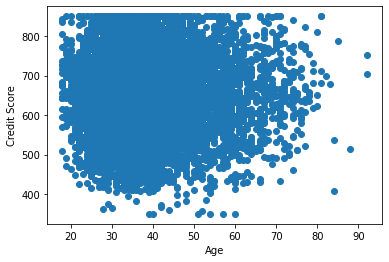

In [10]:
plt.scatter(x = df['Age'],y = df['CreditScore'])
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

ii) Correlation coefficient

In [11]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


* Multi - Variate Analysis

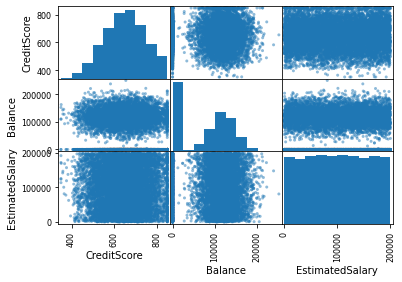

In [12]:
features = ['CreditScore', 'Balance', 'EstimatedSalary']
pd.plotting.scatter_matrix(df[features])
plt.show()

4.  Perform descriptive statistics on the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5.  Handle the Missing values.


In [15]:
df.isna().sum()
#There is no null value in any of the columns

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
# Therefore, for demonstration, we are replacing rows with balance = 0 with the mean balance value.
df.loc[df['Balance']==0 ,'Balance'] = df['Balance'].mean()

In [17]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


6. Find the outliers and replace the outliers

i) Finding the outliers

In [18]:
import plotly.express as px
from array import *
def detect_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return np.where((x > upper_bound) | (x < lower_bound))

In [19]:
fig = px.box(df, x='CreditScore')
fig.show()
l = detect_outliers(df['CreditScore'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 15


In [20]:
fig = px.box(df, x='Age')
fig.show()
l = detect_outliers(df['Age'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 359


In [21]:
fig = px.box(df, x='Tenure')
fig.show()
l = detect_outliers(df['Tenure'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 0


In [22]:
fig = px.box(df, x='Balance')
fig.show()
l = detect_outliers(df['Balance'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 24


In [23]:
fig = px.box(df, x='NumOfProducts')
fig.show()
l = detect_outliers(df['NumOfProducts'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 60


In [24]:
fig = px.box(df, x='EstimatedSalary')
fig.show()
l = detect_outliers(df['EstimatedSalary'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 0


ii) Replacing the outliers

In [25]:
for i in df:
  if df[i].name != 'RowNumber' and df[i].name != 'CustomerId':
    if df[i].dtype == 'int64' or df[i].dtype == 'float64' :
      q1=df[i].quantile(0.25)
      q3=df[i].quantile(0.75)
      iqr=q3-q1
      upper=q3+1.5*iqr
      lower=q1-1.5*iqr
      df[i]=np.where(df[i] >upper, upper, df[i])
      df[i]=np.where(df[i] <lower, lower, df[i])

After replacing the outliers

In [26]:
fig = px.box(df, x='CreditScore') #CreditScore
fig.show()
l = detect_outliers(df['CreditScore'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 0


In [27]:
fig = px.box(df, x='Age') #Age
fig.show()
l = detect_outliers(df['Age'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 0


In [28]:
fig = px.box(df, x='NumOfProducts') #Balance
fig.show()
l = detect_outliers(df['NumOfProducts'])[0].tolist()
print('Number of outliers: ' + str(len(l)))

Number of outliers: 0


7. Check for Categorical columns and perform encoding.

i) Finding categorical columns

In [56]:
df.select_dtypes(exclude='number') #Hascrd, IsActiveMember, Excited have been converted explicitly to 'category' type

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


ii) Perform encoding

I) One-hot encoding

In [57]:
one_hot_1 = pd.get_dummies(df['Geography'])
one_hot_2 = pd.get_dummies(df['Gender'])
df1 = df.join(one_hot_1)
df1 = df1.join(one_hot_2)
df1 = df1.drop('Geography',axis = 1)
df1 = df1.drop('Gender',axis = 1)

In [58]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


II) Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if (df[i].dtype=='object' or df[i].dtype=='category') and df[i].name != 'Surname':
        df[i]=encoder.fit_transform(df[i])

In [64]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


8. Split the data into dependent and independent variables.

In [65]:
independent = df.iloc[:, df.columns != 'Exited']
dependent = df.iloc[:, df.columns == 'Exited']

In [66]:
independent

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52


In [67]:
dependent

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


9. Scale the independent variables


In [70]:
independent = independent.drop('Surname', axis=1)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(independent)

In [72]:
print(x)

[[-1.73187761 -0.78321342 -0.32622142 ...  0.64609167  0.97024255
   0.02188649]
 [-1.7315312  -0.60653412 -0.44003595 ... -1.54776799  0.97024255
   0.21653375]
 [-1.73118479 -0.99588476 -1.53679418 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.7315312  -0.11935577  1.25683526 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.73187761 -0.87055909  1.46377078 ...  0.64609167 -1.03067011
  -1.07636976]]


10. Split the data into training and testing

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,dependent,test_size=0.33)

In [75]:
x_train.shape

(6700, 12)

In [76]:
x_test.shape

(3300, 12)

In [77]:
y_train.shape

(6700, 1)

In [78]:
y_test.shape

(3300, 1)